# MultiLayer Perceptron Classifier

see https://scikit-learn.org/stable/modules/neural_networks_supervised.html

This first example aims at illustrating the interest of multilayer perceptron in a decision problem which is not linearly separable.  
The principle is identical to the principle of the simple (single layer) perceptron, but extends the learner strucrure to many layers.  

In [1]:
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import numpy as np

## 1. Example of boolean functions
###  Create and visualize data for the logical "AND"
$$ y = x_1 \& x_2 $$

red = 0 ; blue=1  : 


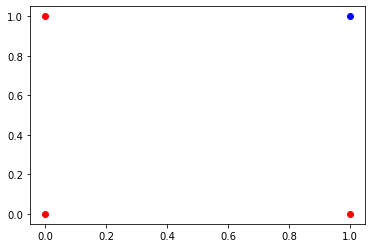

In [2]:
#logical AND
X=[[0.,.0],[1.,1.],[1,0],[0,1]]
y=[0,1,0,0]
#print(X)
for i in range(4):
    if y[i]==0:
        plt.plot(np.asarray(X)[i,0], np.asarray(X)[i,1],'or'); 
    else:
        plt.plot(np.asarray(X)[i,0], np.asarray(X)[i,1],'ob');  
            
print('red = 0 ; blue=1  : ')

### Question
- Is this 2 clusters problem linearly separable? 
- how many layers are necessary to separate the two clusters?
- Would a Perceptron (similar to the the one studied in N1_Perceptron.ipynb) be a acceptable solution? 

### Use scikit-learn MLPClassifier, with a single layer

see https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier

for more information about the function and input/output prarameters

In [3]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(1,), random_state=1, activation='logistic')
clf.fit(X,y)
y_pred=clf.predict(X)
print('Predicted values for y = {}'.format(y_pred)) 
print('coefficient matrix sizes : ', [coef.shape for coef in clf.coefs_])
print('MLPC coefs_ :{}'.format(clf.coefs_))
print('MLPC intercepts_ :{}'.format(clf.intercepts_))

Predicted values for y = [0 1 0 0]
coefficient matrix sizes :  [(2, 1), (1, 1)]
MLPC coefs_ :[array([[-5.46921293],
       [-5.38327331]]), array([[-20.96286574]])]
MLPC intercepts_ :[array([7.11764196]), array([8.32999353])]


### Question
- Draw the learner structure and its edges with corresponding weights. 
- What is tha activation function used in this MLPC? 
- In the MLPC computation above, 'lbfgs' is used as a solver, not 'sgd'. Explain why?


### Ploting decision regions

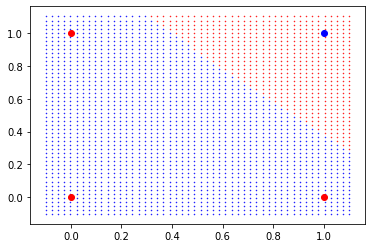

In [4]:
xt=np.linspace(-.1,1.1,50)
yt=np.linspace(-.1,1.1,50)
Xt,Yt= np.meshgrid(xt,yt)
XYt = np.vstack([Xt.flatten(), Yt.flatten()]).T

Z=clf.predict(XYt)
for i in range(4):
    if y[i]==0:
        plt.plot(np.asarray(X)[i,0], np.asarray(X)[i,1],'or'); 
    else:
        plt.plot(np.asarray(X)[i,0], np.asarray(X)[i,1],'ob');  
        
plt.scatter(XYt[Z==0,0],XYt[Z==0,1],s=1,c='b',marker='.')
plt.scatter(XYt[Z==1,0],XYt[Z==1,1],s=1,c='r',marker='.')

### Create and visualize data for the logical "OR"

$$𝑦=𝑥_1 \rm{\hspace{2mm}or\hspace{2mm}} 𝑥_2$$

red = 0 ; blue=1  : 


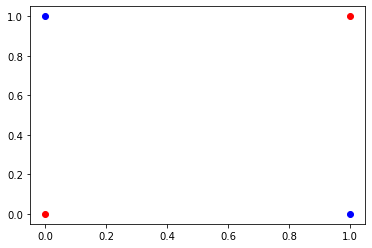

In [4]:
#logical XOR
X=[[0.,.0],[1.,1.],[1,0],[0,1]]
y=[0,0,1,1]
for i in range(4):
    if y[i]==0:
        plt.plot(np.asarray(X)[i,0], np.asarray(X)[i,1],'or'); 
    else:
        plt.plot(np.asarray(X)[i,0], np.asarray(X)[i,1],'ob');  
            
print('red = 0 ; blue=1  : ')

Predicted values for y = [0 0 1 1]
coefficient matrix sizes :  [(2, 3), (3, 2), (2, 1)]
MLPC coefs_ :[array([[  2.49113048,  10.37927209,  -3.93023881],
       [ -3.44361696, -12.93840108,   2.81888708]]), array([[-2.56427241,  2.85637796],
       [ 5.81880418, -5.83583809],
       [ 2.96110157, -4.78143851]]), array([[ 10.62276552],
       [-14.77839749]])]
MLPC intercepts_ :[array([ 1.69485755, -7.86125704, -1.40106803]), array([-0.11500609,  0.3481566 ]), array([0.91199681])]


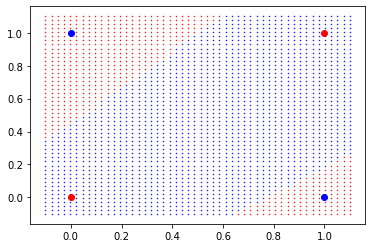

In [5]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,2), \
                    random_state=1, activation='logistic')
clf.fit(X,y)
y_pred=clf.predict(X)
print('Predicted values for y = {}'.format(y_pred)) 
print('coefficient matrix sizes : ', [coef.shape for coef in clf.coefs_])
print('MLPC coefs_ :{}'.format(clf.coefs_))
print('MLPC intercepts_ :{}'.format(clf.intercepts_))

# Visu
xt=np.linspace(-.1,1.1,50)
yt=np.linspace(-.1,1.1,50)
Xt,Yt= np.meshgrid(xt,yt)
XYt = np.vstack([Xt.flatten(), Yt.flatten()]).T

Z=clf.predict(XYt)
for i in range(4):
    if y[i]==0:
        plt.plot(np.asarray(X)[i,0], np.asarray(X)[i,1],'or'); 
    else:
        plt.plot(np.asarray(X)[i,0], np.asarray(X)[i,1],'ob');  
        
plt.scatter(XYt[Z==0,0],XYt[Z==0,1],s=1,c='b',marker='.')
plt.scatter(XYt[Z==1,0],XYt[Z==1,1],s=1,c='r',marker='.')

### Questions
- Would any solution involving a single layer lead to a correct result?

## 2. More realistic classification toy problem (concentric clusters)
This example is the same as in section 7. of N1_Perceptron.ipynb

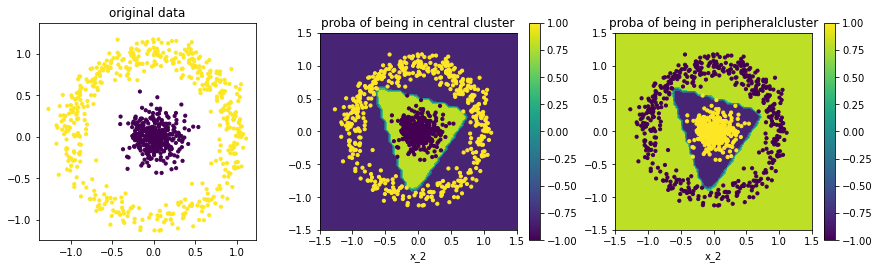

In [125]:
# Create data 
#############
std=.1
N=500

M1=(np.random.randn(N)*std+1)
P1=(np.random.rand(N)*3*np.pi)
y1=np.ones(len(M1))
M2=(np.random.randn(N)*std*2)
P2=(np.random.rand(N)*2*np.pi)
y2=np.ones(len(M1))*-1
M=np.concatenate((M1,M2))
P=np.concatenate((P1,P2))

X=np.column_stack((M,P))
label=np.concatenate((y1,y2))

data=np.multiply(M,np.exp(1j*P))
Xcart=np.column_stack((data.real,data.imag))


# Learn a MLP Classifier : 
##########################
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(3,3), \
                    random_state=1, activation='logistic', \
                   max_iter=2500)
clf.fit(Xcart,label)



# Visualize some results
########################

plt.figure(figsize=[15,4])

plt.subplot(131)
plt.scatter(Xcart[:,0],Xcart[:,1],c=label,s=10)
plt.axis('square');
plt.title('original data')

# sample the observation space :
x=np.linspace(-1.5,1.5,50)
y=np.linspace(-1.5,1.5,50)
X,Y= np.meshgrid(x,y)
XY = np.vstack([X.flatten(), Y.flatten()]).T
# Apply MLP Classif to the samples : 
Z=clf.predict(XY)
Pr=clf.predict_proba(XY)
Pr0=Pr[:,0]
Pr1=Pr[:,1]

# plot the probability values over the observation space :
plt.subplot(132)
Pr0=np.reshape(Pr0,[x.size,y.size])
plt.contourf(x,y,Pr0, levels=5)
plt.scatter(Xcart[:,0],Xcart[:,1],c=label,s=10)
plt.axis('square')
plt.colorbar()
plt.title('proba of being in central cluster')
plt.xlabel('x_1')
plt.xlabel('x_2')
plt.subplot(133)
Pr1=np.reshape(Pr1,[x.size,y.size])
plt.contourf(x,y,Pr1, levels=5)
plt.scatter(Xcart[:,0],Xcart[:,1],c=-label,s=10)
plt.axis('square')
plt.colorbar()
plt.title('proba of being in peripheralcluster')
plt.xlabel('x_1')
plt.xlabel('x_2');

### Questions
- Run the learning process many times with input paramaters hidden_layer_sizes=(3,2). Comment your findings. Propose an interpretation.
- Increase te number of neurons in the first and second layer and comment your observation. Can you explain your findings? 
- What is different between this method  and the methof used in N1_Perceptron.ipynb notebook?  
- How would you evaluate the performances of the obatined MLPC? 